<a href="https://colab.research.google.com/github/abhi3534/Python-capestone-almabetter/blob/main/Copy_of_IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

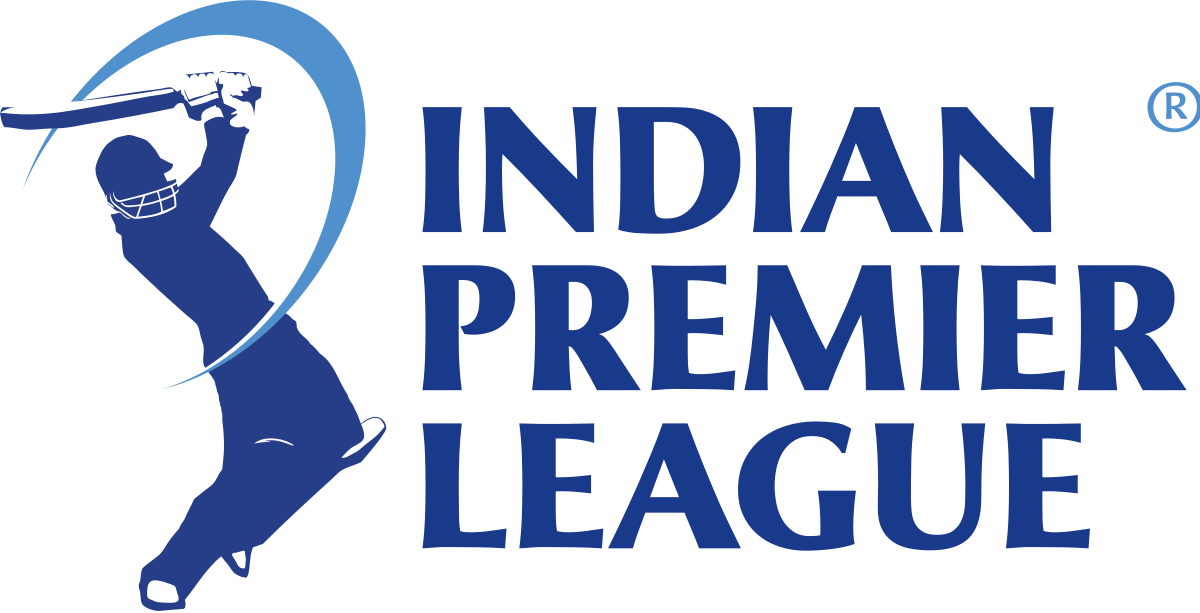

## **What is IPL?**
**Indian Premier League ( IPL )** is a Twenty20 tournament which was founded by the Board of Control for Cricket in India ( BCCI ) in 2008.

IPL is a league of 20 over matches, it means each team plays 20 over from both sides. Every year, there are a total of 8 Teams that represent eight cities of India participating in this tournament.

In IPL, Players of each team are selected in IPL Auction where owners of different teams do the bidding on each local and Overseas Players.Maximum 25 players can be bought by a franchise.

IPL is a very famous tournament in the world, there are more than 411 Million viewers watching live IPL matches every year. due to which every year IPL brand value is increasing, as of now, its brand value is $6.7 Billion ( Rs 475 Billion ).

In any IPL match, Out of 11 players of one side, there are only four Overseas players who are allowed to play a match and remaining players should be of Indian Continent.


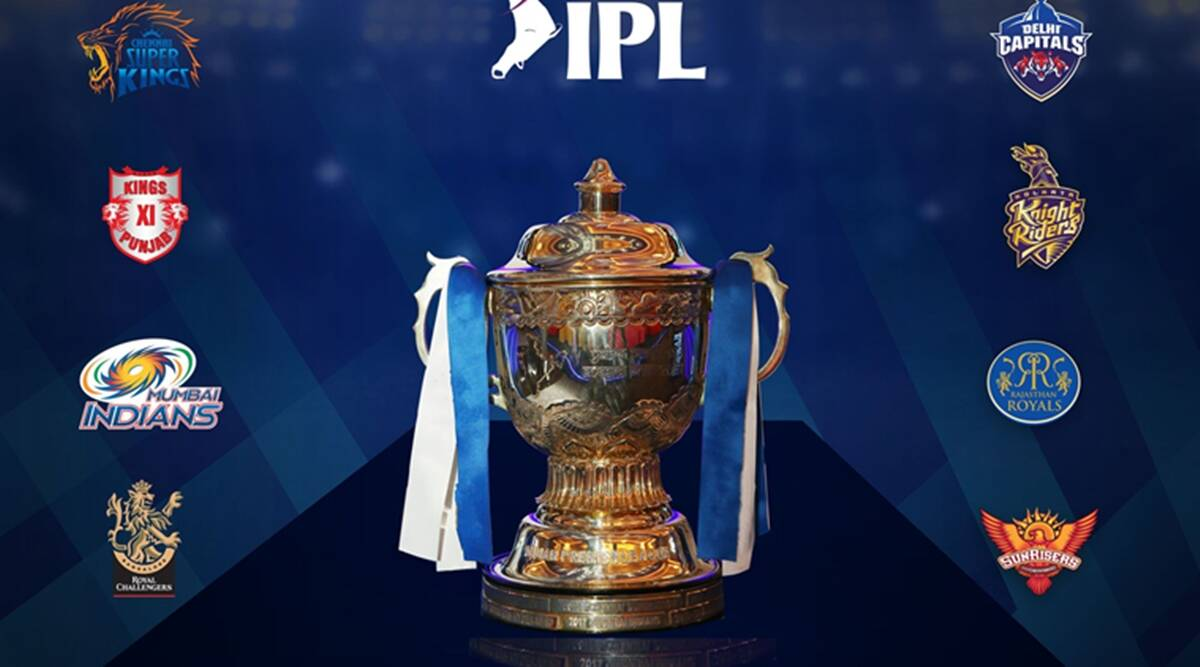

##**How is IPL played?**

There are a total of eight teams, each team plays with another team twice. In these two matches, one is played on the home ground of one team and other is played on another team's home ground.

With eight teams, the total number of matches played is 56, though this number can change incase of ties or increase in the number of teams. Two points allocated for a winning team. The top four teams who have maximum points qualify for the playoffs.

In the playoffs, the top two teams will play against each other to qualify for the final. Bottom two teams will play against each other and the loser of this match will be eliminated from the tournament.

Now, the loser of top teams and winner of the bottom two teams will play against each other and that decides the second finalist of IPL.

Finally the finalists play against each other to win the IPL trophy and prize money as much as 10 crores.


# Now let's look at the problem statement.

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

## The dataset provided consists of the following:


*   Players Data
*   Deliveries Data
*   Matches Data
*   Teams Data
*   Most runs,  Average and Strikerate Data
*   Teamwise Home and Away Data

Great! Now that we know what data we have let us import important libraries to start with the visual exploration of the data. 

The libraries we have used are 

* Pandas as pd
* Numpy as np
* Seaborn as sns
* Pyplot from matplot library as plt

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

To start working with data it is necessary to mount drive and import the data to colaboratory. We do this using following commands

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [143]:
working_dir_path = '/content/drive/MyDrive/Colab Notebooks/IPL Data/'
players_df = pd.DataFrame(pd.read_excel((working_dir_path + 'Copy of Players.xlsx')))
deliveries_df = pd.DataFrame(pd.read_csv((working_dir_path + 'Copy of deliveries.csv')))
runs_df = pd.DataFrame(pd.read_csv((working_dir_path + 'Copy of most_runs_average_strikerate.csv')))
winrate_df = pd.DataFrame(pd.read_csv((working_dir_path + 'Copy of teamwise_home_and_away.csv')))
matches_df = pd.DataFrame(pd.read_csv((working_dir_path + 'Copy of matches.csv')))
teams_df = pd.DataFrame(pd.read_csv((working_dir_path + 'Copy of teams.csv')))

Now that we have all the data ready to cook. **Let's explore!!**

## How many Season's data we are given?

We are given a vast amount of data. This raises selfdoubt if we could even completely explore it. Let us start by something small. Lets first find out How many Season's data we are given.

In [144]:
matches_df.head() # to know what are contents of matches df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [41]:
array_of_seasons = matches_df.Season.unique() # finding the unique seasons
len(array_of_seasons) # len will give us the total number of season

12

Observation: Thus we now know we have data of 12 seasons.

##No of matches

Now it is important for us to know how many matches were played.L

In [151]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [153]:
no_of_matches = len(matches_df['id'])
print(f"Total {no_of_matches} matches were played")

Total 756 matches were played


Observation : We have data of 756 matches

## Now question is how many matches per season??

We already saw that 8 teams play against each other so total  56 matches have to be played plus 4 matches ie 60. But are there any exceptions??.Let us find out 

In [154]:
# We start by creating a data frame having all seasons and their count
season_count_df = pd.DataFrame(matches_df['Season'].value_counts()) # taking values and converting to df
season_count_df = season_count_df.reset_index() # resetting the index
season_count_df.columns = ['Season', 'no_of_times'] # renaming columns
season_count_df

,Season,no_of_times
0,IPL-2013,76
1,IPL-2012,74
2,IPL-2011,73
3,IPL-2014,60
4,IPL-2010,60
5,IPL-2018,60
6,IPL-2019,60
7,IPL-2016,60
8,IPL-2015,59
9,IPL-2017,59


Let us plot this data.

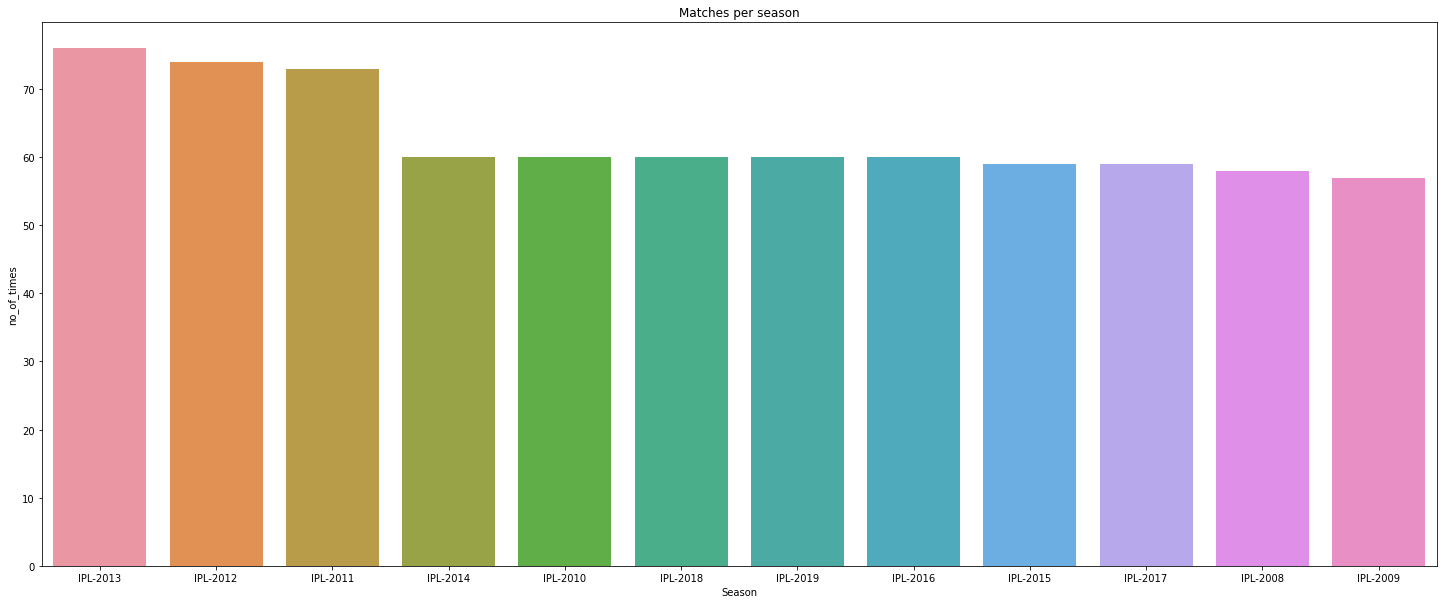

In [155]:
plt.figure(figsize=(25,10)) # setting size of plot
plt.title('Matches per season')
ax = sns.barplot(x="Season", y='no_of_times', data = season_count_df)

Observation: We see some exception for season of 2011,2012 and 2013 and few earlier seasons.

More number of matches played in 2011,12 and 13 were because of the numbers of teams playing the season. 10,9 and 9 teams played in season of 2011, 2012 and 2013 respectively.

## Stadiums

Till 2019 total of 756 matches were played. Question now arises is which stadiums were used? and How many games were played in each of these stadiums. Lets exlore!

In [157]:
# We start by creating a dataframe of stadium names and the number of times macthes were played there
Stadium_df = pd.DataFrame(matches_df['venue'].value_counts()) # taking values and converting to df
Stadium_df = Stadium_df.reset_index() # resetting the index
Stadium_df.columns = ['Stadiums', 'no_of_times'] # renaming columns
Stadium_df

,Stadiums,no_of_times
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73
2,Wankhede Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Dr DY Patil Sports Academy,17


Upon plotting this we get following data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

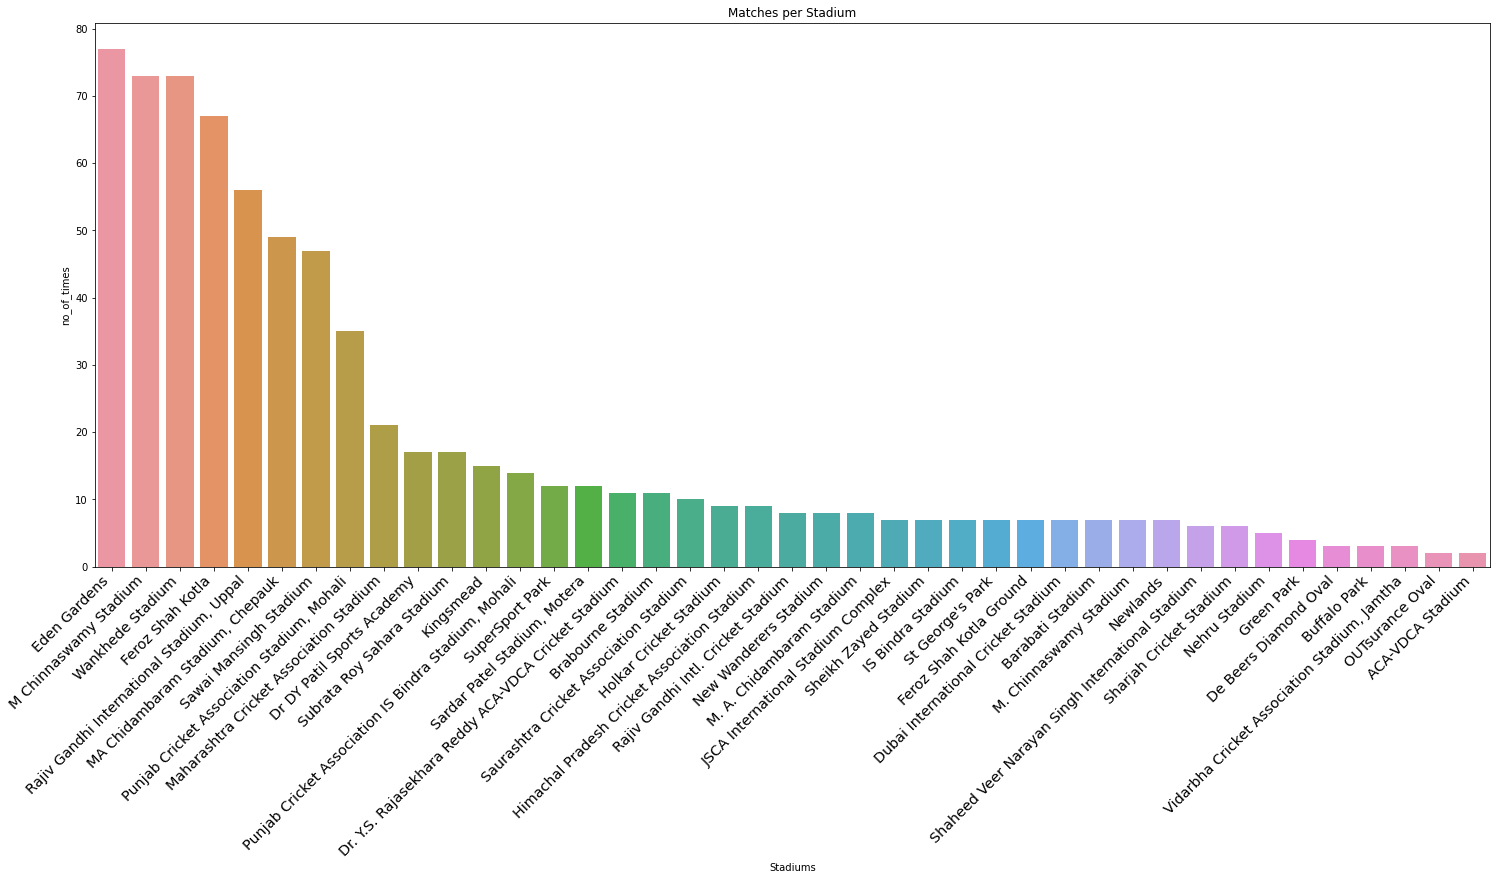

In [158]:
plt.figure(figsize=(25,10)) # setting size of plot
plt.title('Matches per Stadium')
ax = sns.barplot(x="Stadiums", y='no_of_times', data = Stadium_df)
plt.xticks(rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large' )# this gives the venue names a slant angle and positions them properly

Observation: Total of 41 stadiums have been used. Most matches were played at Eden Gardens followed by other  stadiums

## How many times did each team win?

We saw that 756 matches were played. but who won the most?? Let us find out.

In [161]:
# Yes you got it right we start by making a dataframe of teams and number of times they won.
team_wins_df = pd.DataFrame(matches_df['winner'].value_counts()) # taking values and converting to df
team_wins_df = team_wins_df.reset_index() # resetting the index
team_wins_df.columns = ['Team', 'no_of_times_won'] # renaming columns
team_wins_df

,Team,no_of_times_won
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

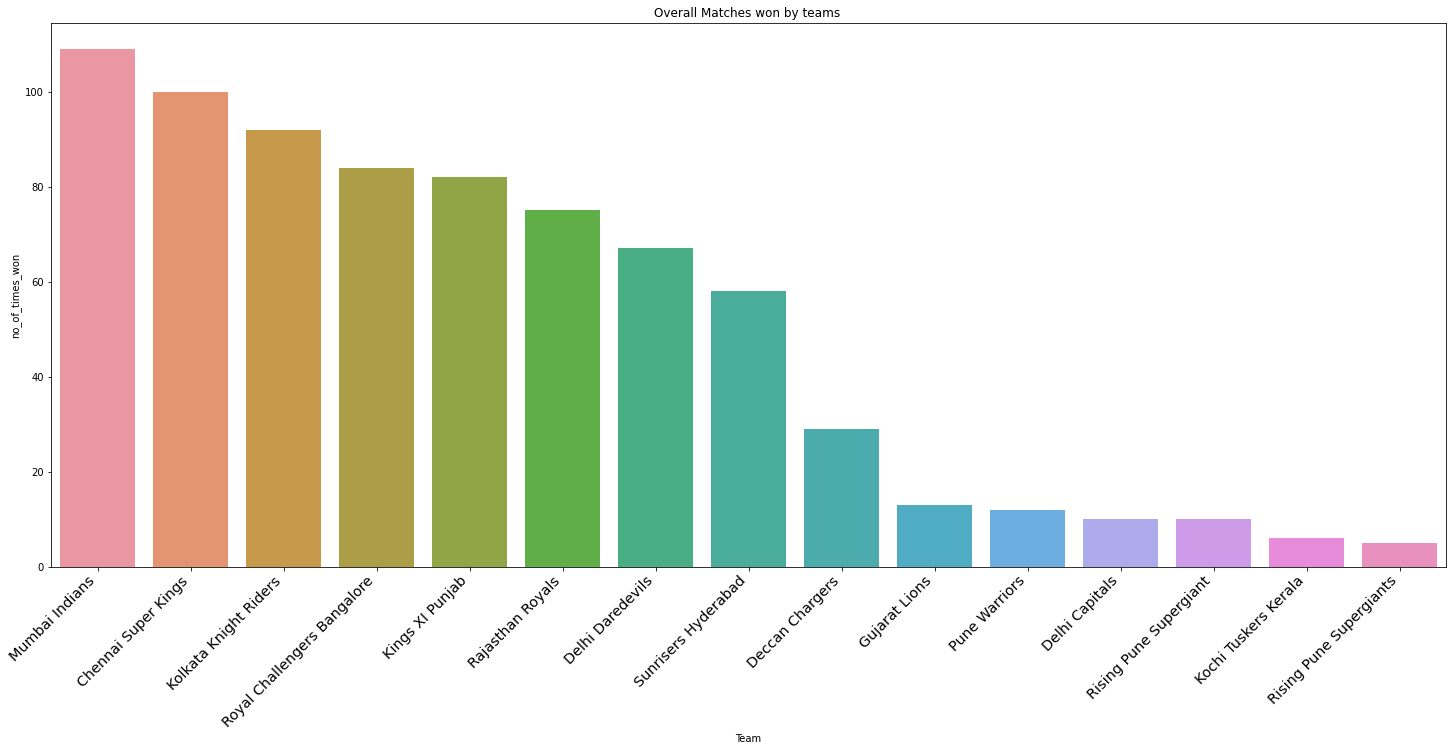

In [163]:
plt.figure(figsize=(25,10)) # setting size of plot
plt.title('Overall Matches won by teams ')
ax = sns.barplot(x="Team", y='no_of_times_won', data = team_wins_df)
plt.xticks(rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large' )

Observation: The graph is pretty self explainatory. 

The reason why last 6 teams have so less matches won is because they were the extra teams that played in 2011,12 and 2013

## Venue , Team and Win relation
We know who won. We know which stadiums were used. I feel you are thinking if there is any realtion between the winners and the venues. Lets try to understand this.

In [168]:
venue_winner_df = matches_df[['venue','winner']]
venue_winner_df

,venue,winner
0,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad
1,Maharashtra Cricket Association Stadium,Rising Pune Supergiant
2,Saurashtra Cricket Association Stadium,Kolkata Knight Riders
3,Holkar Cricket Stadium,Kings XI Punjab
4,M Chinnaswamy Stadium,Royal Challengers Bangalore
...,...,...
751,Wankhede Stadium,Mumbai Indians
752,M. A. Chidambaram Stadium,Mumbai Indians
753,ACA-VDCA Stadium,Delhi Capitals
754,ACA-VDCA Stadium,Chennai Super Kings


In [178]:
# creating a data frame that has counts of countries and players
venue_and_win = pd.DataFrame(venue_winner_df.value_counts()) # taking values and converting to df
venue_and_win = venue_and_win.reset_index() # resetting the index
venue_and_win.columns = ['Venue', 'match_winner','no_of_times'] # renaming columns
top_ten_city_winner = venue_and_win.head(10)
top_ten_city_winner

,Venue,match_winner,no_of_times
0,Eden Gardens,Kolkata Knight Riders,45
1,Wankhede Stadium,Mumbai Indians,42
2,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,34
3,M Chinnaswamy Stadium,Royal Challengers Bangalore,34
4,Sawai Mansingh Stadium,Rajasthan Royals,32
5,Feroz Shah Kotla,Delhi Daredevils,27
6,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,25
7,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,18
8,Eden Gardens,Mumbai Indians,10
9,M Chinnaswamy Stadium,Mumbai Indians,8


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

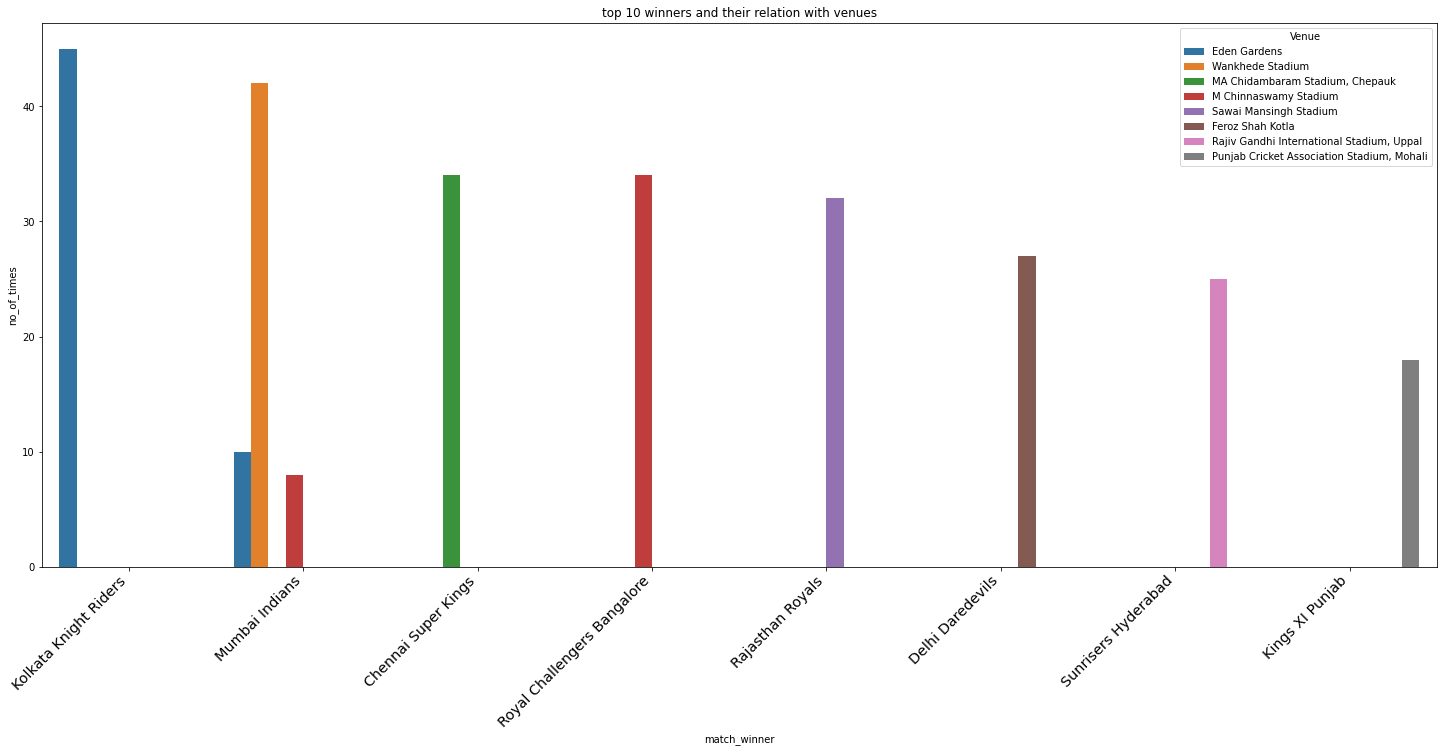

In [174]:
plt.figure(figsize=(25,10)) # setting size of plot
plt.title('top 10 winners and their relation with venues')
ax = sns.barplot(x="match_winner", y='no_of_times',hue="Venue", data = top_ten_city_winner)
plt.xticks(rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large' )

Observation: Mumbai seems to be only team in top 10 to have won at 3 different stadiums . 

KKR on the other hand seems to  have won in their own home ground the most.

## Home and Away victory teamwise comparison

That is what we had to do. Like why did KKR won most at their home ground. Is there any home ground advantage??. 

In [175]:
winrate_df # trying to know the contents of teamwise home and away data

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


In [176]:
home_wins = winrate_df.sort_values(by=['home_wins'],ascending=False) # sorting data based on home wins and adding it to home_wins
away_wins = winrate_df.sort_values(by=['away_wins'],ascending=False) # sorting data based on away wins and adding it to away_wins

Lets Rank teams based on their Home win rate

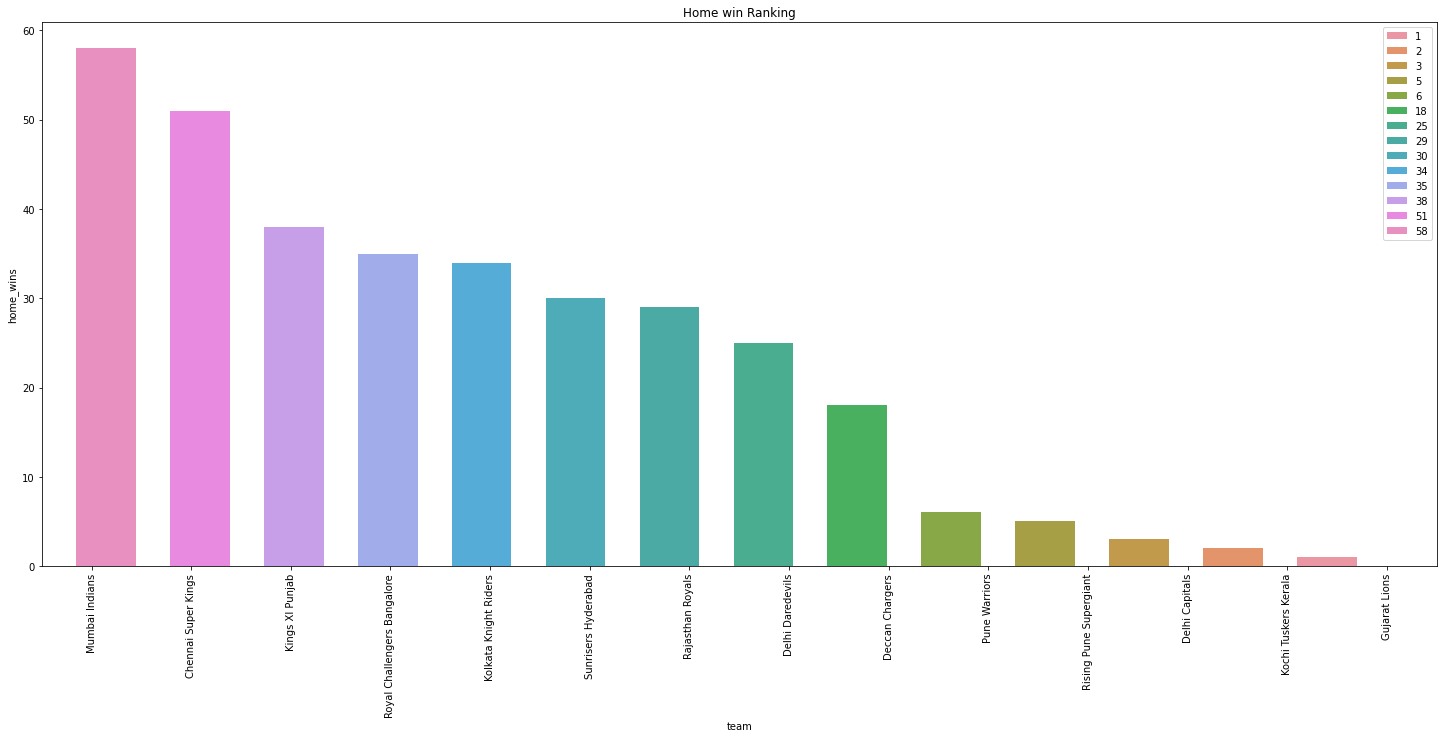

In [ ]:
plt.figure(figsize=(25,10)) # setting size of plot
plt.title('Home win Ranking')
ax = sns.barplot(y="home_wins", x='team', hue ='home_wins', data = home_wins)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.legend(loc='upper right')
for patch in ax.patches:
  current_width = patch.get_width()
  diff = current_width - .8
  patch.set_width(.6)
  patch.set_x(patch.get_x() - .5)


Wait!! This contracdicts with the earlier conclusion. Does it?

No. This is because a few seasons of IPL have been played outside India. In those cases home ground for these teams is not the usual one. Hence there is some variation in that data.

Lets Rank teams based on their Away win rate

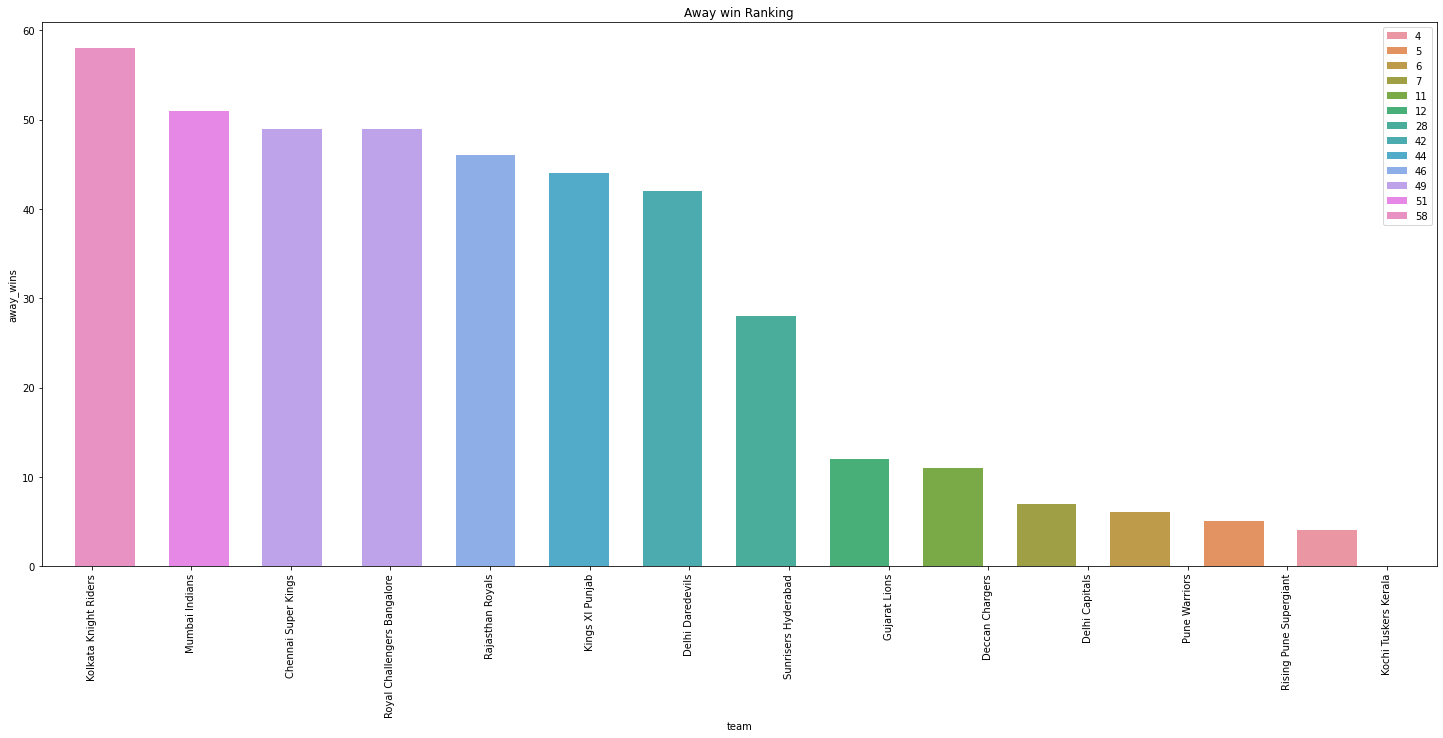

In [180]:
plt.figure(figsize=(25,10)) # setting size of plot
plt.title('Away win Ranking')
ax = sns.barplot(y="away_wins", x='team', hue ='away_wins', data = away_wins)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees
plt.legend(loc='upper right')
for patch in ax.patches:
  current_width = patch.get_width()
  diff = current_width - .8
  patch.set_width(.6)
  patch.set_x(patch.get_x() - .5)


Plotting both graph side by side we get to know their performance

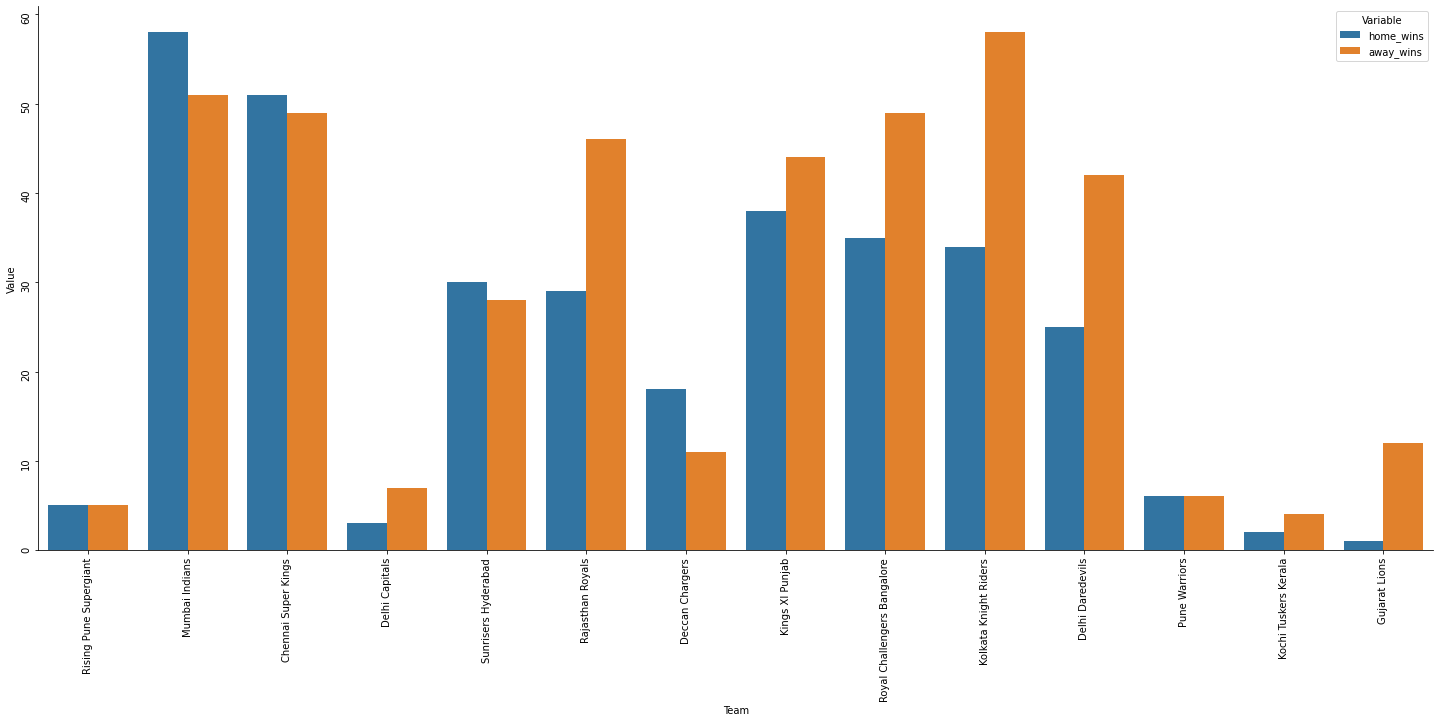

In [ ]:
new_df4 = winrate_df.drop(columns=['home_win_percentage','away_win_percentage','home_matches','away_matches'])
fig, ax1 = plt.subplots(figsize=(25, 10))
tidy = new_df4.melt(id_vars='team').rename(columns=str.title)
sns.barplot(x='Team', y='Value', hue='Variable', data=tidy, ax=ax1)
ax1.tick_params(labelrotation=90)
sns.despine(fig)

This home Wins and Away wins can be better explained if we also consideer the number of matches played by them. I will show you the percentage wise graphs of home and away wins.

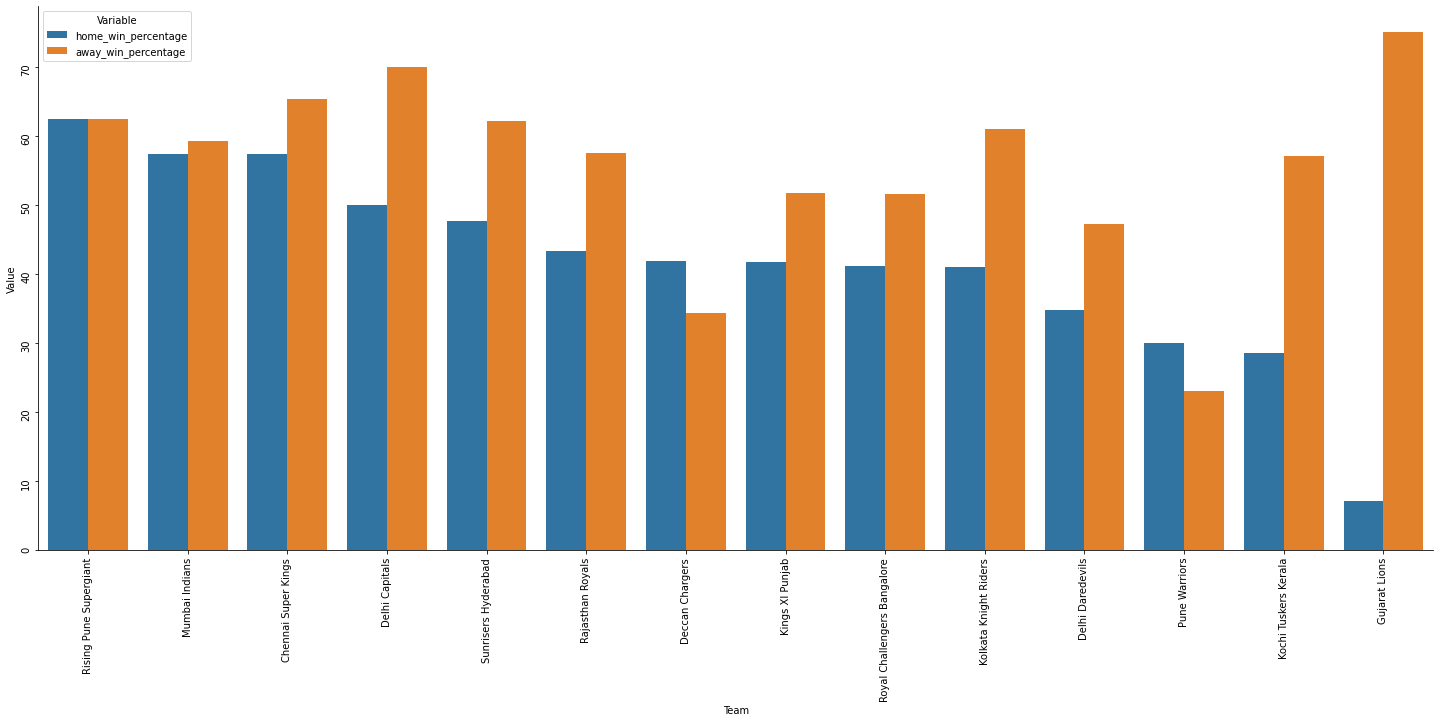

In [ ]:
nnew_df4 = winrate_df.drop(columns=['home_wins','away_wins','home_matches','away_matches'])
fig, ax1 = plt.subplots(figsize=(25, 10))
tidy = nnew_df4.melt(id_vars='team').rename(columns=str.title)
sns.barplot(x='Team', y='Value', hue='Variable', data=tidy, ax=ax1)
ax1.tick_params(labelrotation=90)
sns.despine(fig)

Win percentage is varying when we consider the number of matches played. This is again because of the exception like more teams and different venues.

Observation: Home wins and away wins are great indicator of a teams performance. 

At times the number of teams playing , the number of games each team played and the venues in overall can change the face of the game.

## Which team was lucky?

We know  the relation of home and away ground  with the winning team. Another important factor that also determines the winner and the looser is toss. Toss is all about luck. Toss determines who can choose to field or bat first. So who got lucky the most?? 

In [181]:
# dataframe of tosswinner and its count
toss_and_win = pd.DataFrame(matches_df['toss_winner'].value_counts()) # taking values and converting to df
toss_and_win = toss_and_win.reset_index() # resetting the index
toss_and_win.columns = ['Team', 'no_of_times'] # renaming columns
toss_and_win

,Team,no_of_times
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Kings XI Punjab,81
4,Royal Challengers Bangalore,81
5,Delhi Daredevils,80
6,Rajasthan Royals,80
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

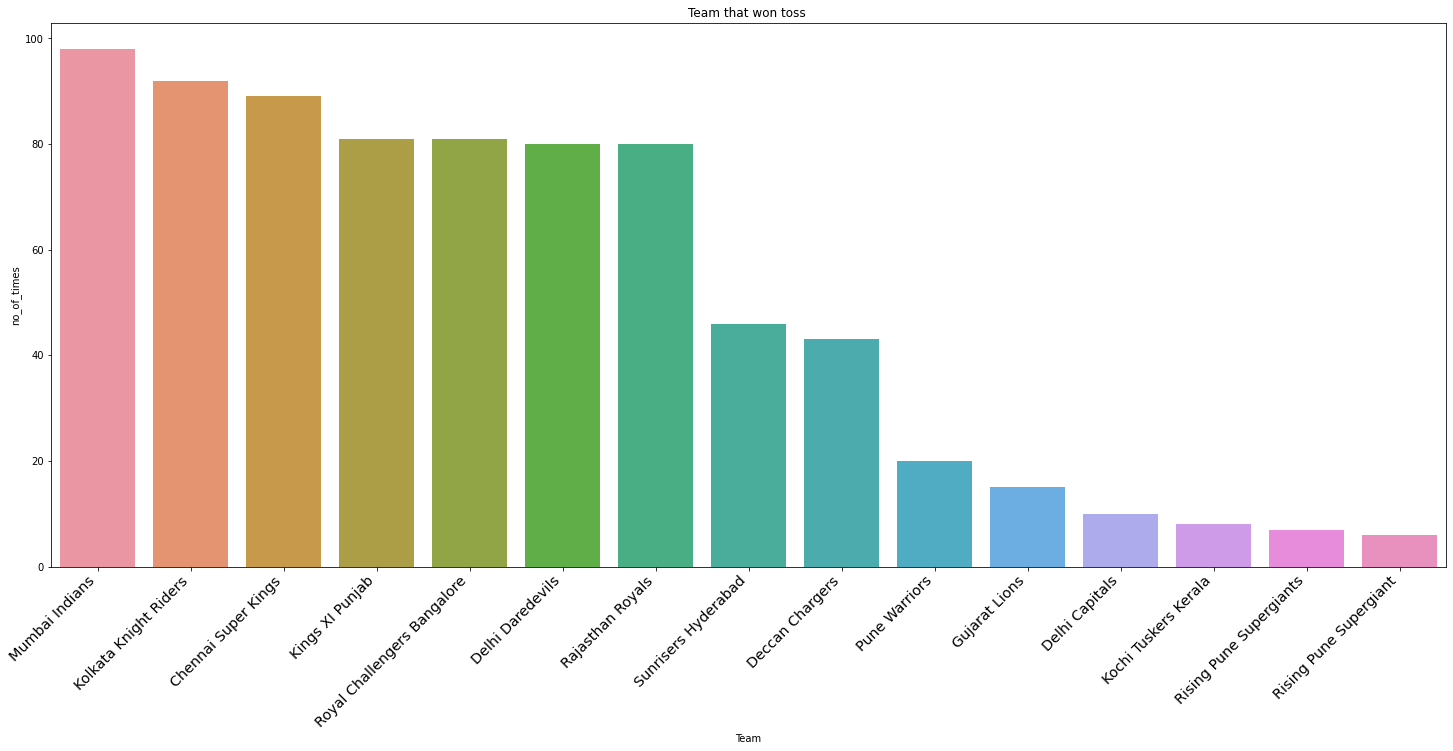

In [183]:
plt.figure(figsize=(25,10)) # setting size of plot
plt.title('Team that won toss ')
ax = sns.barplot(x="Team", y='no_of_times', data = toss_and_win)
plt.xticks(rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large' )

Observation: Mumbai indians is the luckiest, followed by KKR and CSK. Great

## Did the luck worked??

In [184]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [186]:
toss_winner_df = matches_df[['toss_winner','winner']] # making df of toss winner and match winner
toss_winner_df

,toss_winner,winner
0,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Rising Pune Supergiant,Rising Pune Supergiant
2,Kolkata Knight Riders,Kolkata Knight Riders
3,Kings XI Punjab,Kings XI Punjab
4,Royal Challengers Bangalore,Royal Challengers Bangalore
...,...,...
751,Mumbai Indians,Mumbai Indians
752,Chennai Super Kings,Mumbai Indians
753,Delhi Capitals,Delhi Capitals
754,Chennai Super Kings,Chennai Super Kings


In [187]:
# creating a data frame that has count of winning combination
toss_and_win = pd.DataFrame(toss_winner_df.value_counts()) # taking values and converting to df
toss_and_win = toss_and_win.reset_index() # resetting the index
toss_and_win.columns = ['toss_winner', 'match_winner','no_of_times'] # renaming columns
top_ten = toss_and_win.head(9)
top_ten

,toss_winner,match_winner,no_of_times
0,Chennai Super Kings,Chennai Super Kings,57
1,Mumbai Indians,Mumbai Indians,56
2,Kolkata Knight Riders,Kolkata Knight Riders,53
3,Rajasthan Royals,Rajasthan Royals,42
4,Royal Challengers Bangalore,Royal Challengers Bangalore,41
5,Delhi Daredevils,Delhi Daredevils,35
6,Kings XI Punjab,Kings XI Punjab,35
7,Sunrisers Hyderabad,Sunrisers Hyderabad,23
8,Deccan Chargers,Deccan Chargers,19


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

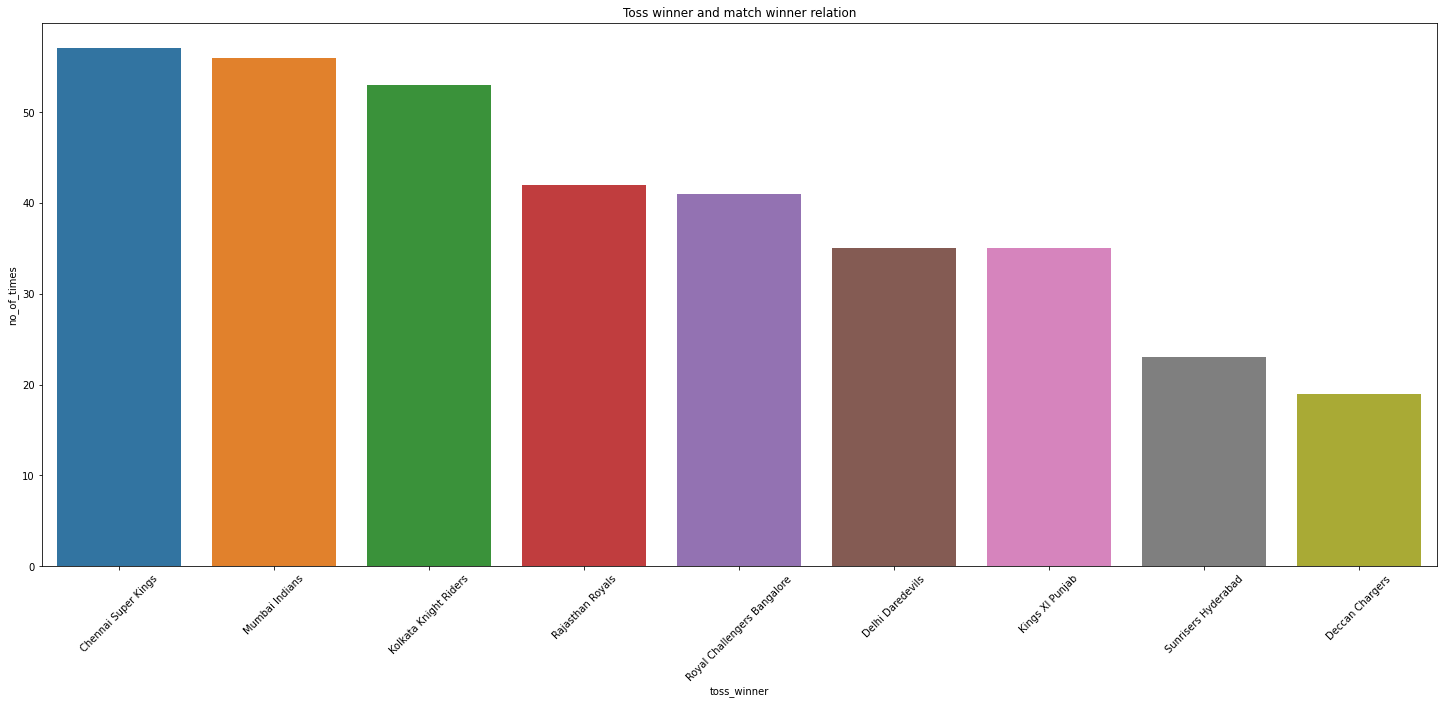

In [189]:
plt.figure(figsize=(25,10)) # setting size of plot
plt.title('Toss winner and match winner relation')
ax = sns.barplot(x="toss_winner", y='no_of_times', data = top_ten)
plt.xticks(rotation = 45)

Observatiton: So It seems like CSK had more coversion rate than MI when it came to toss to win ratio. 
Note that Deccan Charges is an exception team. Remaining 8 are still existing teams

## Who won by max runs? (top 5)

In [190]:
matches_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [192]:
max_run_winner_df = matches_df[['winner','win_by_runs']]
max_run_winner_df_sorted = max_run_winner_df.sort_values(by=['win_by_runs'],ascending=False)
top_max_run_winner_df = max_run_winner_df_sorted.head()
top_max_run_winner_df

,winner,win_by_runs
43,Mumbai Indians,146
619,Royal Challengers Bangalore,144
59,Kolkata Knight Riders,140
556,Royal Challengers Bangalore,138
410,Royal Challengers Bangalore,130


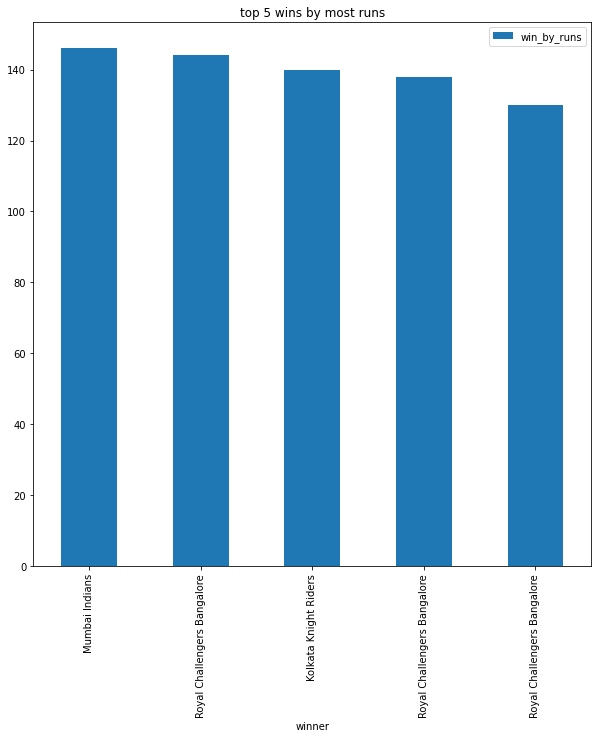

In [193]:
top_max_run_winner_df.plot(x="winner" ,kind='bar',figsize=(10,10),title='top 5 wins by most runs')

Observation: MI has won by max runs followed by RCB and KKR. RCB has won by max runs thrice.

## Who won by min runs? (top 5)

In [194]:
min_run_winner_df = matches_df[['winner','win_by_runs']]
min_run_winner_df_sorted = min_run_winner_df.sort_values(by=['win_by_runs'],ascending=True)
min_run_winner_df = min_run_winner_df_sorted.head(419)
min_run_winner_df

,winner,win_by_runs
278,Delhi Daredevils,0
662,Mumbai Indians,0
285,Pune Warriors,0
460,Rajasthan Royals,0
283,Pune Warriors,0
...,...,...
135,Delhi Daredevils,0
511,Kings XI Punjab,0
133,Royal Challengers Bangalore,0
132,Rajasthan Royals,0


In [195]:
# creating a data frame that has counts of countries and players
min_run_winner_count_df = pd.DataFrame(min_run_winner_df.value_counts()) # taking values and converting to df
min_run_winner_count_df = min_run_winner_count_df.reset_index() # resetting the index
min_run_winner_count_df.columns = ['Team', 'runs','no_of_times'] # renaming columns
top_min_run_winner_count_df = min_run_winner_count_df.head(10)
top_min_run_winner_count_df

,Team,runs,no_of_times
0,Kolkata Knight Riders,0,56
1,Mumbai Indians,0,52
2,Royal Challengers Bangalore,0,49
3,Chennai Super Kings,0,48
4,Rajasthan Royals,0,48
5,Kings XI Punjab,0,44
6,Delhi Daredevils,0,42
7,Sunrisers Hyderabad,0,28
8,Gujarat Lions,0,12
9,Deccan Chargers,0,11


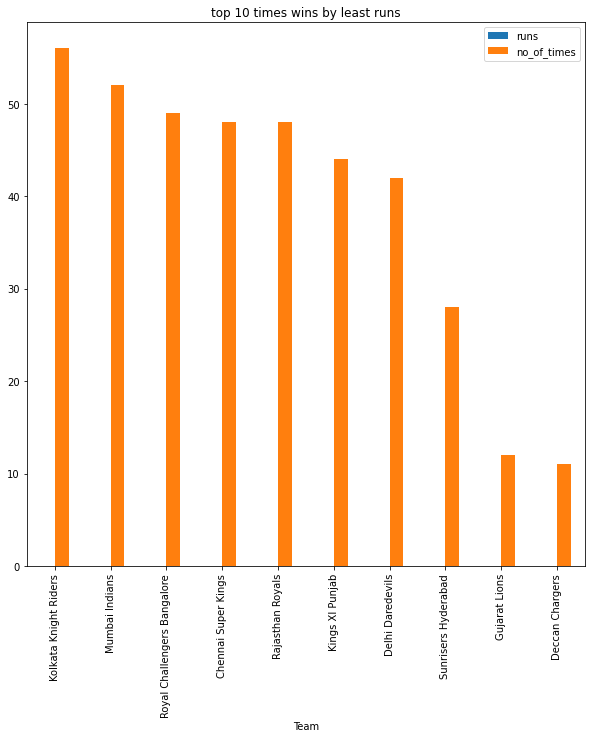

In [196]:
top_min_run_winner_count_df.plot(x="Team",kind='bar',figsize=(10,10),title='top 10 times wins by least runs')

Observation: Min is 0 runs. The above chart shows how many times a team has won by 0 runs. KKR tops this chart followed by MI and RCB.

## Which team won by keeping most wickets and how many times?

In [197]:
wickets_winner_df = matches_df[['winner','win_by_wickets']]
wickets_winner_df_sorted = wickets_winner_df.sort_values(by=['win_by_wickets'],ascending=False)
most_wickets_winner_df = wickets_winner_df_sorted.head(11)

In [198]:
# creating a data frame that has counts of countries and players
win_keeping_most_wickets_df = pd.DataFrame(most_wickets_winner_df.value_counts()) # taking values and converting to df
win_keeping_most_wickets_df = win_keeping_most_wickets_df.reset_index() # resetting the index
win_keeping_most_wickets_df.columns = ['Team', 'No of wickets','no_of_times'] # renaming columns
top_win_keeping_most_wickets_df = win_keeping_most_wickets_df.head(10)
top_win_keeping_most_wickets_df

,City,match_winner,no_of_times
0,Royal Challengers Bangalore,10,3
1,Sunrisers Hyderabad,10,1
2,Rajasthan Royals,10,1
3,Mumbai Indians,10,1
4,Kolkata Knight Riders,10,1
5,Kings XI Punjab,10,1
6,Delhi Daredevils,10,1
7,Deccan Chargers,10,1
8,Chennai Super Kings,10,1


Observation: RCB has won by saving most wickets . Most wickets that could be saved are 10.

## Which team won by loosing most wickets?

In [199]:
min_wickets_winner_df = matches_df[['winner','win_by_wickets']]
min_wickets_winner_df_sorted = min_wickets_winner_df.sort_values(by=['win_by_wickets'],ascending=True)
min_wickets_winner_df = min_wickets_winner_df_sorted.head(350)
min_wickets_winner_df

,winner,win_by_wickets
0,Sunrisers Hyderabad,0
420,Mumbai Indians,0
418,Delhi Daredevils,0
417,Chennai Super Kings,0
416,Mumbai Indians,0
...,...,...
19,Royal Challengers Bangalore,0
18,Sunrisers Hyderabad,0
105,Kings XI Punjab,0
117,Mumbai Indians,0


In [200]:
# creating a data frame that has counts of countries and players
min_wickets_winner_count_df = pd.DataFrame(min_wickets_winner_df.value_counts()) # taking values and converting to df
min_wickets_winner_count_df = min_wickets_winner_count_df.reset_index() # resetting the index
min_wickets_winner_count_df.columns = ['Team', 'Wickets','no_of_times'] # renaming columns
top_min_wickets_winner_count_df = min_wickets_winner_count_df.head(10)
top_min_wickets_winner_count_df

,Team,Wickets,no_of_times
0,Mumbai Indians,0,59
1,Chennai Super Kings,0,52
2,Kings XI Punjab,0,40
3,Royal Challengers Bangalore,0,36
4,Kolkata Knight Riders,0,36
5,Sunrisers Hyderabad,0,31
6,Rajasthan Royals,0,29
7,Delhi Daredevils,0,25
8,Deccan Chargers,0,18
9,Pune Warriors,0,6


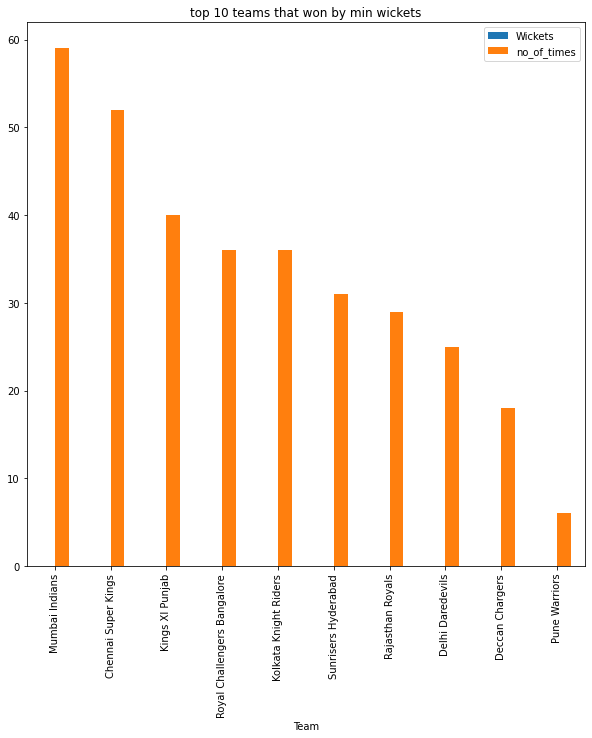

In [204]:
top_min_wickets_winner_count_df.plot(x="Team" ,kind='bar',figsize=(10,10),title='top 10 teams that won by min wickets')

Observarion: MI won most matches by keeping list wickets . 

## Where are the players from?

We saw who won and who lost and different factors like toss and ground that affected the winning and loosing percentages. 

Now any team is made only when there are players. IPL was succesful in attracting players from aorund the globe. Except Pakistan players which played only few IPL season before getting banned , most players played IPL. But where were they from??

In [205]:
players_df.drop(columns=['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'], inplace=True, axis=1)

In [207]:
players_df.dropna(axis=0, how='any')

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
5,A Flintoff,1977-12-06,Right_Hand,Right-arm fast-medium,England
8,A Kumble,1970-10-17,Right_Hand,Legbreak googly,India
...,...,...,...,...,...
560,YK Pathan,1982-11-17,Right_Hand,Right-arm offbreak,India
561,Younis Khan,1977-11-29,Right_Hand,Right-arm medium,Pakistan
562,YS Chahal,1990-07-23,Right_Hand,Legbreak googly,India
563,Yuvraj Singh,1981-12-12,Left_Hand,Slow left-arm orthodox,India


In [208]:
# creating a data frame that has counts of countries and players

country_of_players = pd.DataFrame(players_df['Country'].value_counts()) # taking values and converting to df
country_of_players = country_of_players.reset_index() # resetting the index
country_of_players.columns = ['Country', 'Number_of_players'] # renaming columns
country_of_players

,Country,Number_of_players
0,India,264
1,Australia,72
2,South Africa,39
3,New Zealand,22
4,Sri Lanka,20
5,West Indies,19
6,England,14
7,Pakistan,13
8,Bangladesh,5
9,Zimbabwea,2


<Figure size 1440x720 with 0 Axes>

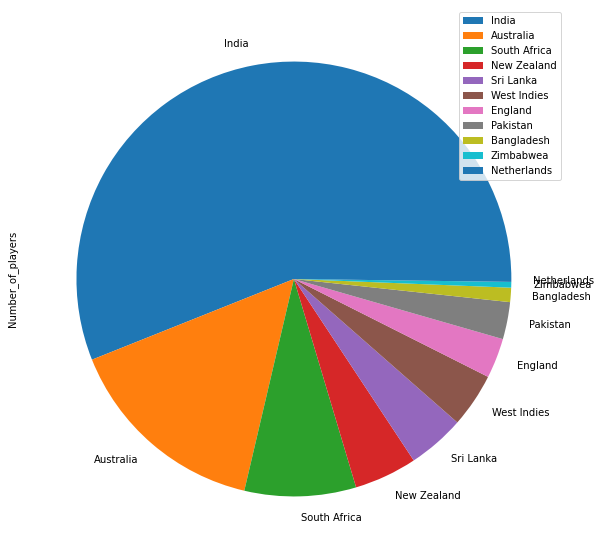

In [225]:
#visualizing data

plt.figure(figsize=(20, 10)) # setting size of plot
plot = country_of_players.plot.pie(y='Number_of_players',labels=country_of_players.Country, figsize=(10,10)) # bar plot with country as x axis and number of players as

Observation: Definitely PLayers from India are most as per rule. But next to India we have Australia and South africa. Cool isn't it??


##Age group of players as of in 2020

Fitness and age determine a players performance. A team like CSK where average age of players was 30 in 2019. Age bring problems with fitness and aged people are prone to injuries. But age also brings Experience that can also be a reason for CSK to win So many times. 

Let us find out how many players fall in which category.

In [226]:
Age_of_players = pd.DataFrame(players_df['DOB'].dt.year.value_counts()) # taking values and converting to df
Age_of_players = Age_of_players.reset_index() # resetting the index
Age_of_players.columns = ['Year_of_Birth', 'Number_of_players'] # renaming columns
Age_of_players['Age'] = 2020 - Age_of_players['Year_of_Birth']
Age_of_players

,Year_of_Birth,Number_of_players,Age
0,1984.0,41,36.0
1,1990.0,33,30.0
2,1981.0,32,39.0
3,1983.0,32,37.0
4,1987.0,31,33.0
5,1985.0,31,35.0
6,1988.0,30,32.0
7,1989.0,26,31.0
8,1986.0,24,34.0
9,1982.0,23,38.0


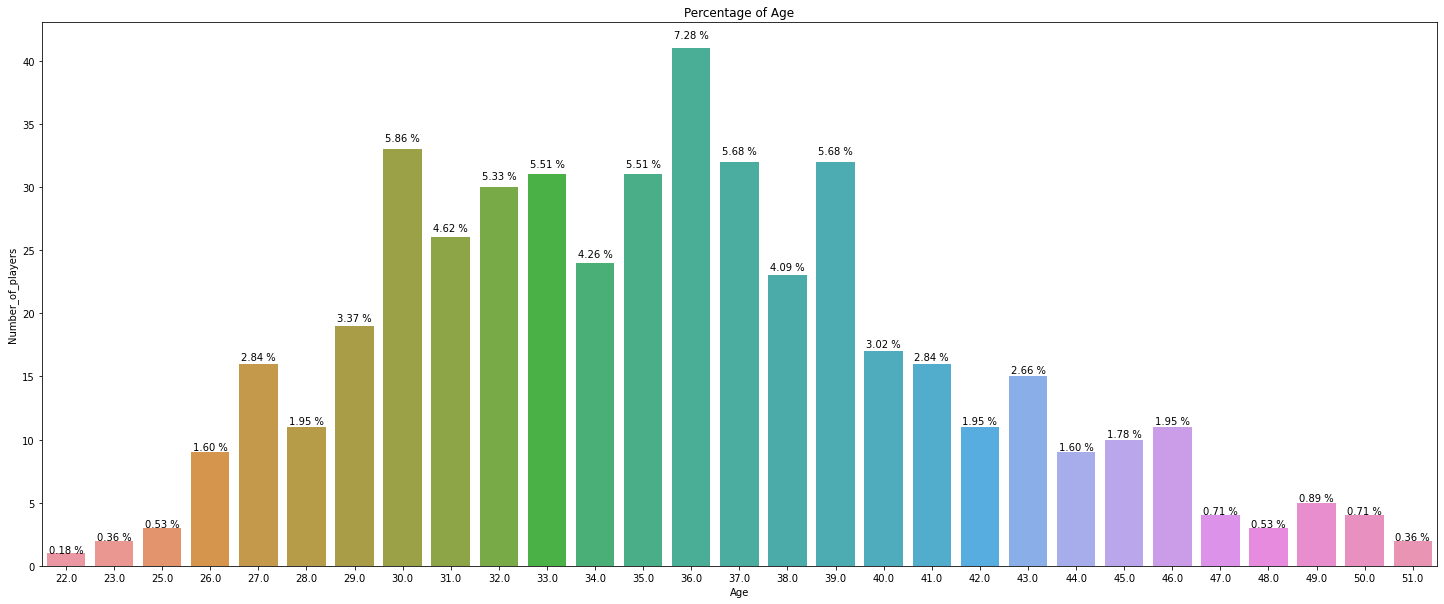

In [227]:
#visualizing data

plt.figure(figsize=(25, 10)) # setting size of plot
plt.title('Percentage of Age')
ax = sns.barplot(x="Age", y='Number_of_players', data = Age_of_players) # bar plot with hand as x axis and number of players as y
total = 421+142
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    per = height *100 / total
    x, y = p.get_xy() 
    ax.annotate(f'{per:.2f} %', (x + width/2, y + height*1.02), ha='center')

Observation: From data we see that many players are 36 year old while 22 year old are very few.

## Players and their batting hand

Batsman are very crucial and the runs scored by them or runs chased can be huge contributers to the win and loss of match. 

Batsman can be of two types. Right hand batsman and left Hand batsman.
Which are the most? Lets find out.

In [229]:
# creating a data frame that has counts of batting hand and players
players_df.replace(to_replace='Right_hand', value='Right_Hand',inplace=True) # this step helps us avoid mistake in data interpretaion due to different spelling of same object
Hand_of_players = pd.DataFrame(players_df['Batting_Hand'].value_counts()) # taking values and converting to df
Hand_of_players = Hand_of_players.reset_index() # resetting the index
Hand_of_players.columns = ['Batting_hand', 'Number_of_players'] # renaming columns
Hand_of_players

,Batting_hand,Number_of_players
0,Right_Hand,421
1,Left_Hand,142


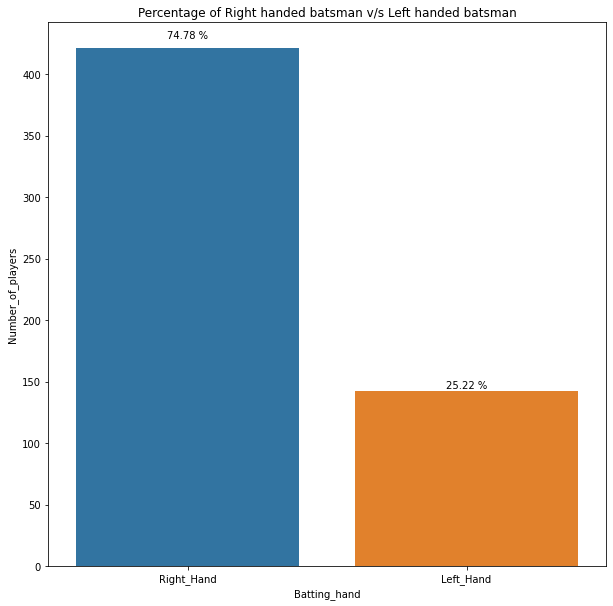

In [230]:
#visualizing data

plt.figure(figsize=(10, 10)) # setting size of plot
plt.title('Percentage of Right handed batsman v/s Left handed batsman')
ax = sns.barplot(x="Batting_hand", y='Number_of_players', data=Hand_of_players) # bar plot with hand as x axis and number of players as y
total = 421+142
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    per = height *100 / total
    x, y = p.get_xy() 
    ax.annotate(f'{per:.2f} %', (x + width/2, y + height*1.02), ha='center')

Observation: We can observe that 3/4th batsman are Right handed.  

## Purple cap winner for all season

In [231]:
df3_Most_runs = runs_df.sort_values(by=['total_runs'],ascending=False)

In [232]:
top_5_df3_Most_runs = df3_Most_runs.head()
top_5_df3_Most_runs

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881


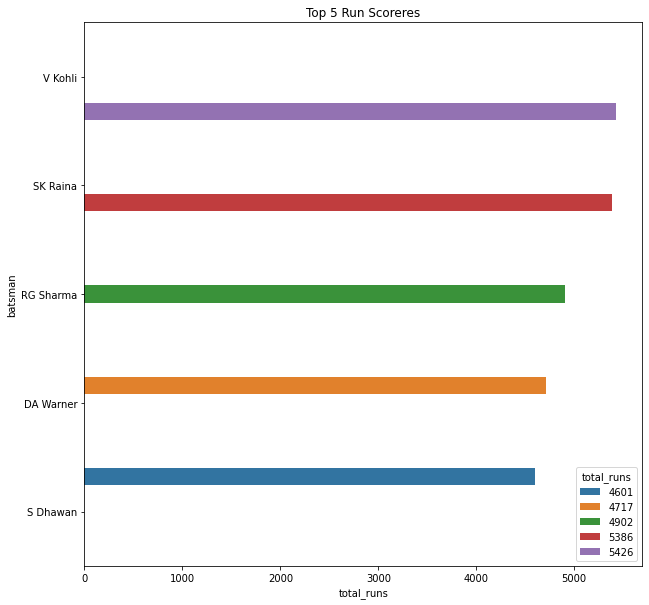

In [233]:
plt.figure(figsize=(10,10)) # setting size of plot
plt.title('Top 5 Run Scoreres')
ax = sns.barplot(x="total_runs", y='batsman', hue='total_runs', data = top_5_df3_Most_runs)

Observation. We see that VIrat kohli is top run getter. 

## Top 5 players with Best strike rate

In [234]:
df3_best_strike_ratee = runs_df.sort_values(by=['strikerate'],ascending=False)

In [235]:
top_5_df3_best_strike_ratee = df3_best_strike_ratee.head()
top_5_df3_best_strike_ratee

,batsman,total_runs,out,numberofballs,average,strikerate
443,B Stanlake,5,0,2,NaN,250.000000
449,KMDN Kulasekara,5,0,2,NaN,250.000000
301,Umar Gul,39,3,19,13.0,205.263158
462,VRV Singh,4,1,2,4.0,200.000000
461,RS Sodhi,4,0,2,NaN,200.000000


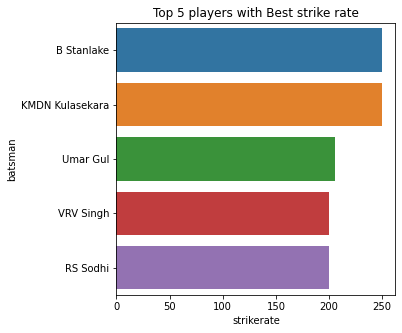

In [236]:
plt.figure(figsize=(5,5)) # setting size of plot
plt.title('Top 5 players with Best strike rate')
ax = sns.barplot(x="strikerate", y='batsman', data = top_5_df3_best_strike_ratee)

Observation: We see that B stanlake has best strike rate. Why is this.? Thuis again works like percentage. Strike rate is runs scored per ball or total runs by total balls. Thus someone who played 1 ball and got 1 run will have higher strike rate than someone who played 100 balls and got 90 runs. 




## Top 5 players with Best average

In [237]:
df3_best_average = runs_df.sort_values(by=['average'],ascending=False)

In [238]:
top_5_df3_best_average = df3_best_average.head()
top_5_df3_best_average

,batsman,total_runs,out,numberofballs,average,strikerate
243,Iqbal Abdulla,88,1,83,88.000000,106.024096
109,J Bairstow,459,8,284,57.375000,161.619718
180,MN van Wyk,167,3,132,55.666667,126.515152
159,PD Collingwood,203,4,156,50.750000,130.128205
97,HM Amla,577,13,407,44.384615,141.769042


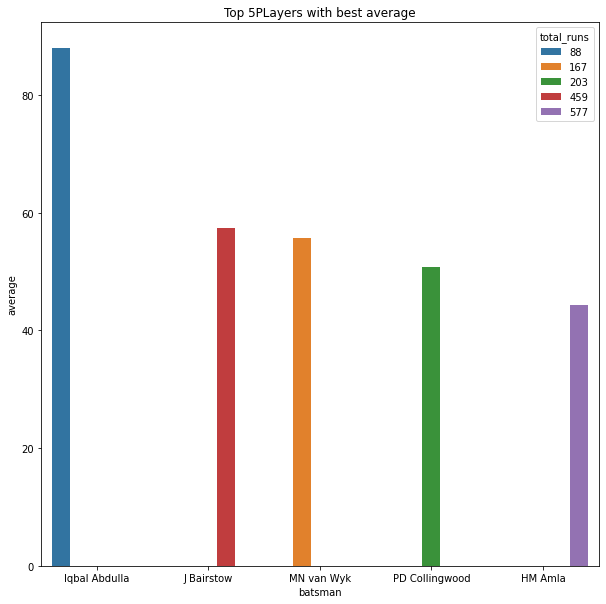

In [240]:
plt.figure(figsize=(10,10)) # setting size of plot
plt.title('Top 5PLayers with best average')
ax = sns.barplot(y="average", x='batsman', hue='total_runs', data = top_5_df3_best_average)

Observation: We see that Iqbal abdulla has best average. average is runs scored per ball or total runs by total balls. Thus someone who played 1 match and got 1 run will have higher average than someone who played 100 match and got 900 runs.










## Who hit most 4 s

In [241]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [242]:
fours = [4]
df_fours = deliveries_df[deliveries_df['batsman_runs'].isin(fours)]
max_4_df = df_fours[["batsman",'batsman_runs']]
max_4_df

,batsman,batsman_runs
2,DA Warner,4
8,DA Warner,4
13,MC Henriques,4
30,MC Henriques,4
32,S Dhawan,4
...,...,...
179028,SR Watson,4
179050,SR Watson,4
179051,SR Watson,4
179052,SR Watson,4


In [ ]:
# creating a data frame that has counts of countries and players
max_4_sorted_df = pd.DataFrame(max_4_df.value_counts()) # taking values and converting to df
max_4_sorted_df = max_4_sorted_df.reset_index() # resetting the index
max_4_sorted_df.columns = ['batsman','batsman_runs','no_of_times'] # renaming columns
top_4_scoreses = max_4_sorted_df.head(5)
top_4_scoreses

,batsman,batsman_runs,no_of_times
0,S Dhawan,4,526
1,SK Raina,4,495
2,G Gambhir,4,492
3,V Kohli,4,482
4,DA Warner,4,459


Observation: Shikar Dhavan hit most 526 4s

## Who hit most 6s

In [ ]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
six = [6]
df_sixes = deliveries_df[deliveries_df['batsman_runs'].isin(six)]
max_6_df = df_sixes[["batsman",'batsman_runs']]
max_6_df

,batsman,batsman_runs
10,DA Warner,6
47,MC Henriques,6
75,Yuvraj Singh,6
89,Yuvraj Singh,6
91,MC Henriques,6
...,...,...
178987,SR Watson,6
179048,DJ Bravo,6
179061,SR Watson,6
179062,SR Watson,6


In [ ]:
# creating a data frame that has counts of countries and players
max_6_sorted_df = pd.DataFrame(max_6_df.value_counts()) # taking values and converting to df
max_6_sorted_df = max_6_sorted_df.reset_index() # resetting the index
max_6_sorted_df.columns = ['batsman','batsman_runs','no_of_times'] # renaming columns
top_6_scoreses = max_6_sorted_df.head(5)
top_6_scoreses

,batsman,batsman_runs,no_of_times
0,CH Gayle,6,327
1,AB de Villiers,6,214
2,MS Dhoni,6,207
3,SK Raina,6,195
4,RG Sharma,6,194


Observation: Chris Gayle has hit 6s 327 times.WHOA! Universe Boss!

## Types of bowlers

Unlike batsman which are right handed or left handed bowlers can be of different.

* Fast bowler
* medium fast bowlers
* off spinners
* leg spinners

and also based ontheir hand of choice




In [ ]:
# creating a data frame that has counts of Bowling Type and players
df.replace(to_replace='Right-arm Fast', value='Right-arm fast',inplace=True)
df.replace(to_replace='Right-arm Medium', value='Right-arm medium',inplace=True)
df.replace(to_replace='Right-arm bowler', value='Right-arm medium',inplace=True)
Type_of_bowlers = pd.DataFrame(df['Bowling_Skill'].value_counts()) # taking values and converting to df
Type_of_bowlers = Type_of_bowlers.reset_index() # resetting the index
Type_of_bowlers.columns = ['Bowling_Skill', 'Number_of_players'] # renaming columns
Type_of_bowlers

,Bowling_Skill,Number_of_players
0,Right-arm medium,109
1,Right-arm offbreak,91
2,Right-arm fast-medium,68
3,Slow left-arm orthodox,50
4,Right-arm fast,40
5,Right-arm medium-fast,38
6,Legbreak,30
7,Legbreak googly,28
8,Left-arm fast-medium,19
9,Left-arm medium,11


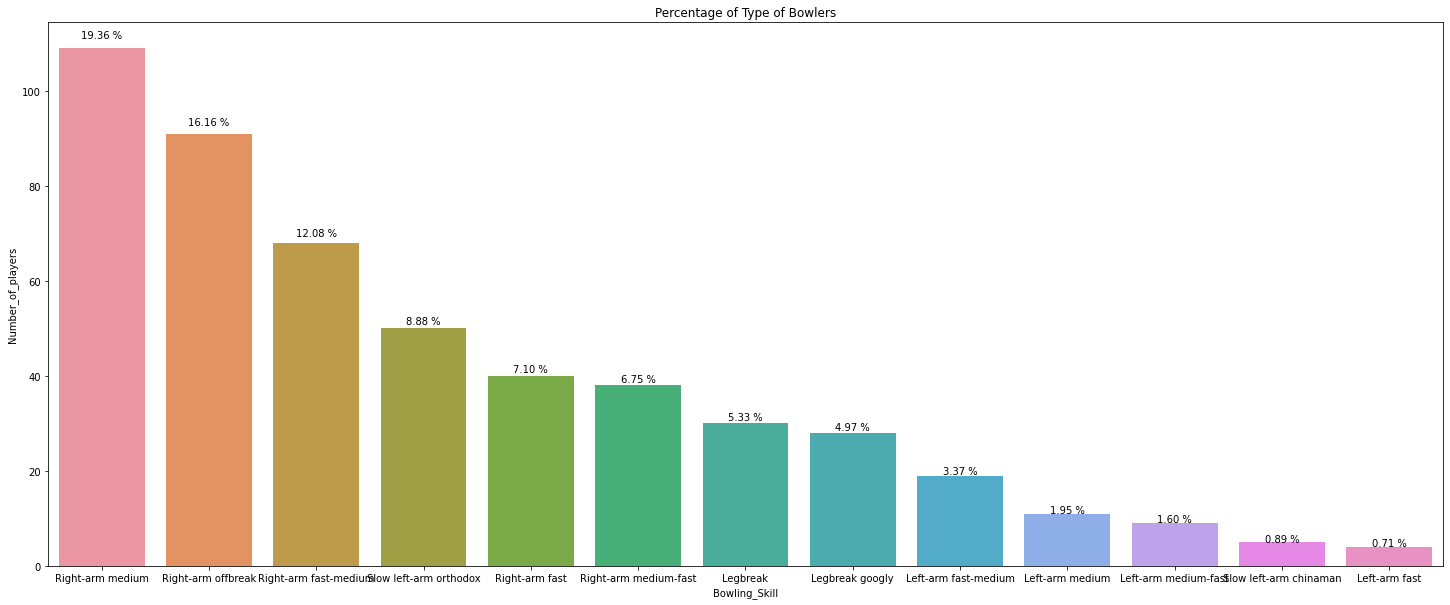

In [ ]:
#visualizing data

plt.figure(figsize=(25, 10)) # setting size of plot
plt.title('Percentage of Type of Bowlers')
ax = sns.barplot(x="Bowling_Skill", y='Number_of_players', data = Type_of_bowlers) # bar plot with hand as x axis and number of players as y
total = 421+142
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    per = height *100 / total
    x, y = p.get_xy() 
    ax.annotate(f'{per:.2f} %', (x + width/2, y + height*1.02), ha='center')

Observation: Just like Right hand dominates Batsmans, it dominates the bowlers too. And medium fast bowlers are more common than spinners.

## Who took most wickets and in which way?


In [251]:
list_of_no_bowler_wicket = [ 'run out','retired hurt', 'hit wicket', 'obstructing the field']
bowler_out_df = deliveries_df[['bowler','dismissal_kind']]
bowler_out_df2.dropna()
bowler_out_df2 = bowler_out_df[~bowler_out_df['dismissal_kind'].isin(list_of_no_bowler_wicket)]
bowler_out_df2
bowler_out_df2.dropna()

,bowler,dismissal_kind
11,A Choudhary,caught
64,STR Binny,caught
94,YS Chahal,caught
116,TS Mills,bowled
160,Rashid Khan,bowled
...,...,...
178977,KH Pandya,stumped
179012,RD Chahar,lbw
179019,JJ Bumrah,caught
179067,JJ Bumrah,caught


In [252]:
# creating a data frame that has counts of countries and players
most_wickets_df = pd.DataFrame(bowler_out_df2.value_counts()) # taking values and converting to df
most_wickets_df = most_wickets_df.reset_index() # resetting the index
most_wickets_df.columns = ['bowler',"dismissal_kind",'no_of_times'] # renaming columns
top__wicket_takers = most_wickets_df
top__wicket_takers.sort_values(by='bowler')

,bowler,dismissal_kind,no_of_times
507,A Ashish Reddy,lbw,3
321,A Ashish Reddy,bowled,6
693,A Ashish Reddy,caught and bowled,1
244,A Ashish Reddy,caught,8
369,A Chandila,caught and bowled,5
...,...,...,...
106,Yuvraj Singh,caught,19
218,Z Khan,lbw,9
88,Z Khan,bowled,22
937,Z Khan,caught and bowled,1


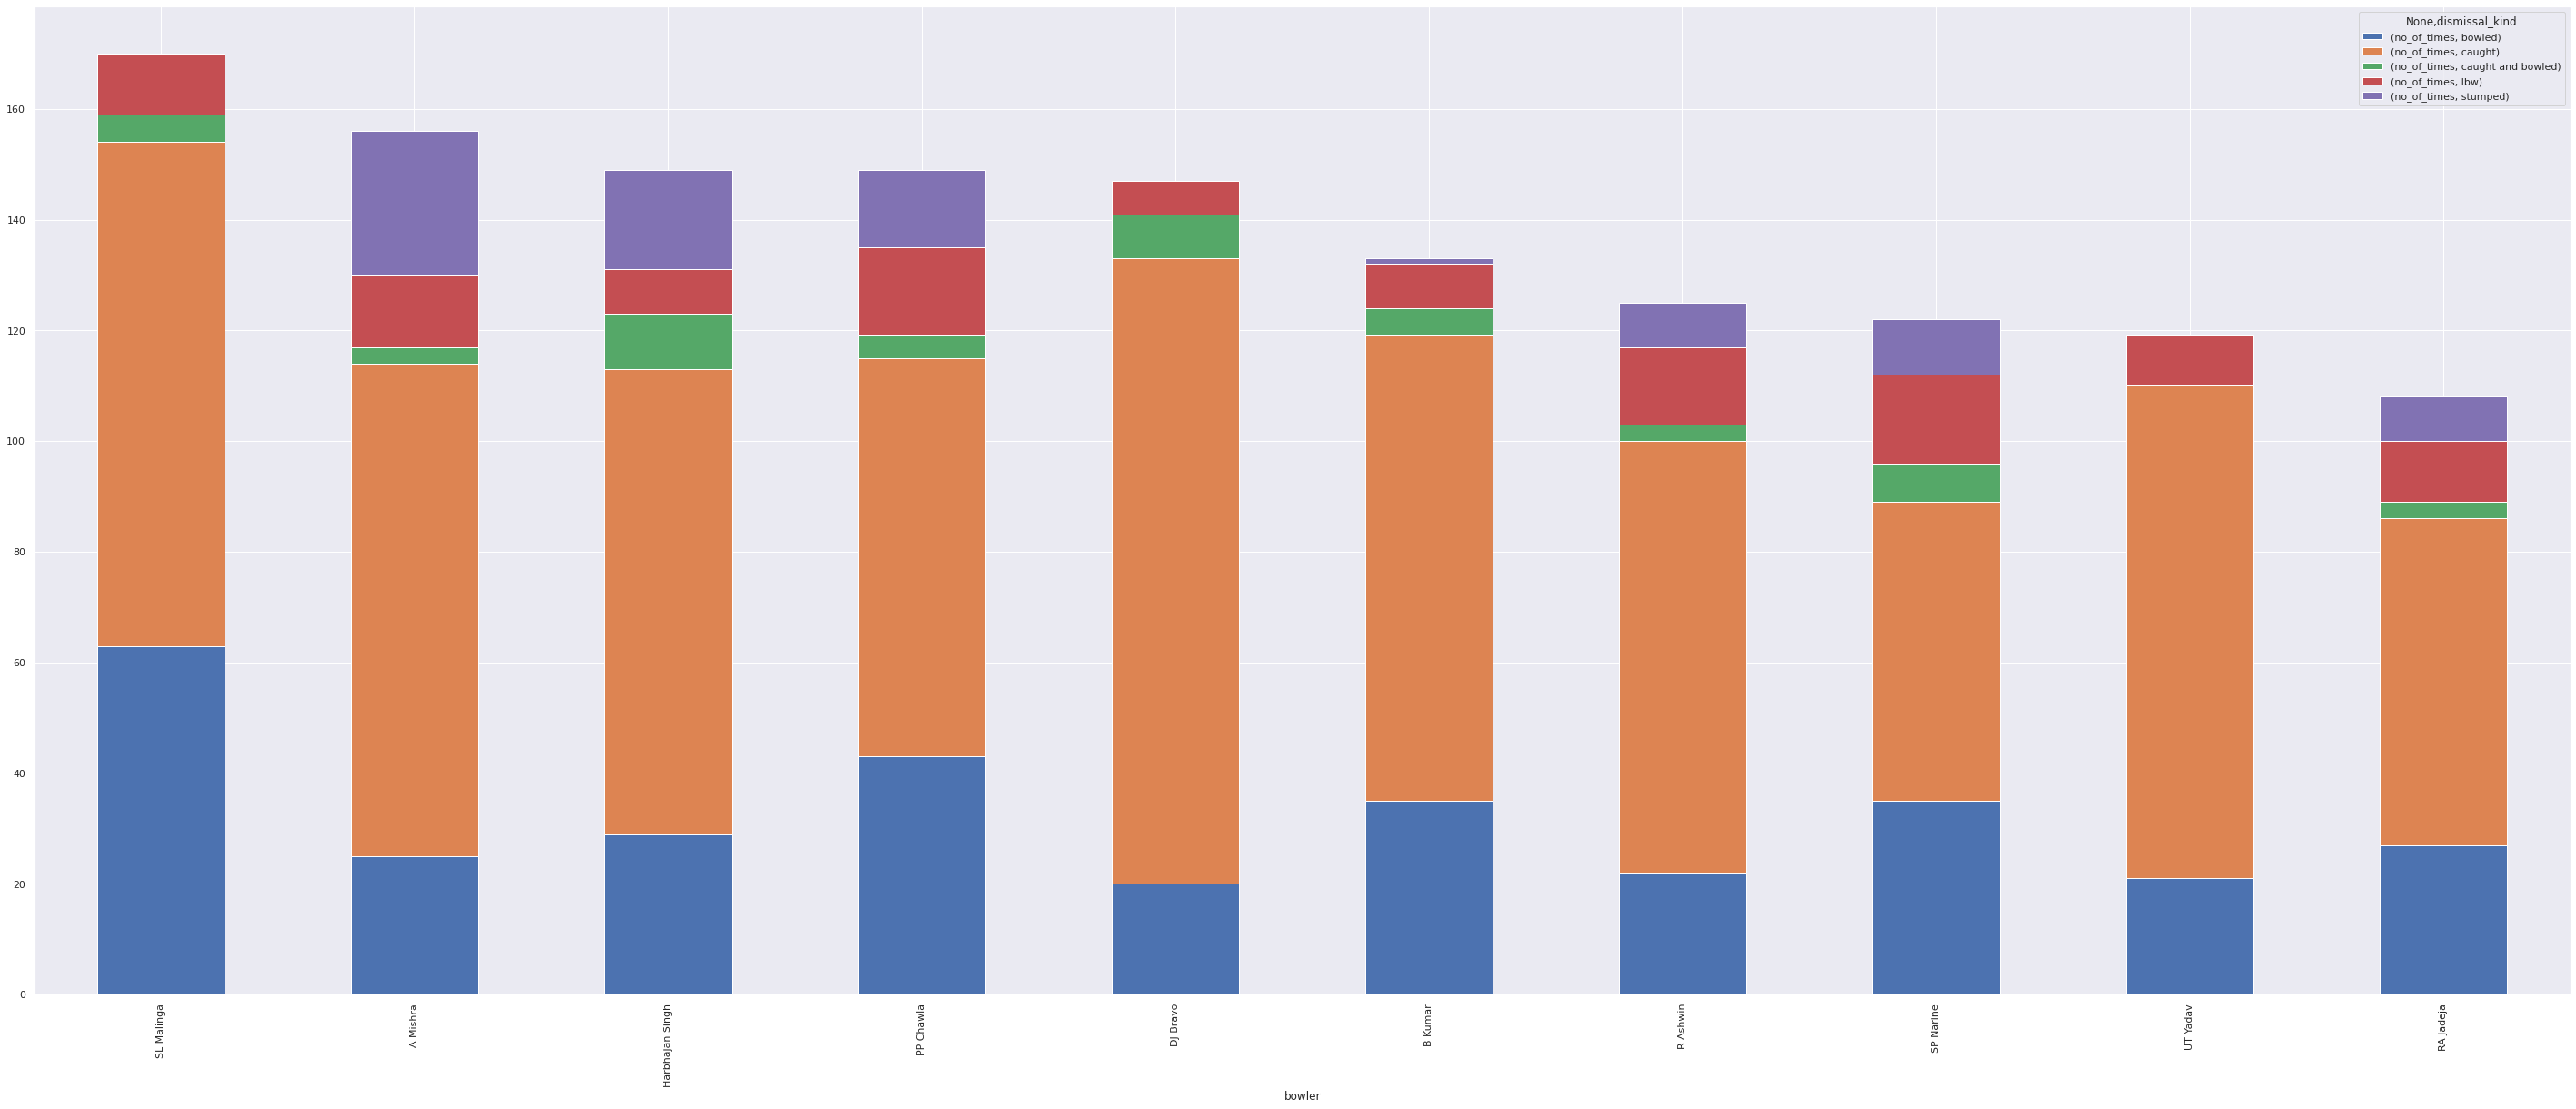

In [ ]:
df112 = top__wicket_takers.groupby(['bowler','dismissal_kind']).sum().unstack().fillna(0)
df112.columns
sum_column = df112['no_of_times', "bowled"]+ df112['no_of_times',"caught"]+ df112['no_of_times',"caught and bowled"]+ df112['no_of_times',"lbw"]+ df112['no_of_times',"stumped"]
df112['total wickets'] = sum_column
df112 = df112.sort_values(by='total wickets',ascending=False)
df112 = df112.drop(columns=["total wickets"])
final_graph = df112.head(10)
final_graph.plot(kind='bar',stacked=True,legend="dismissal_kind",figsize=(50,20))

Observation. Lasith Malinga has been most wicket picking bowlers

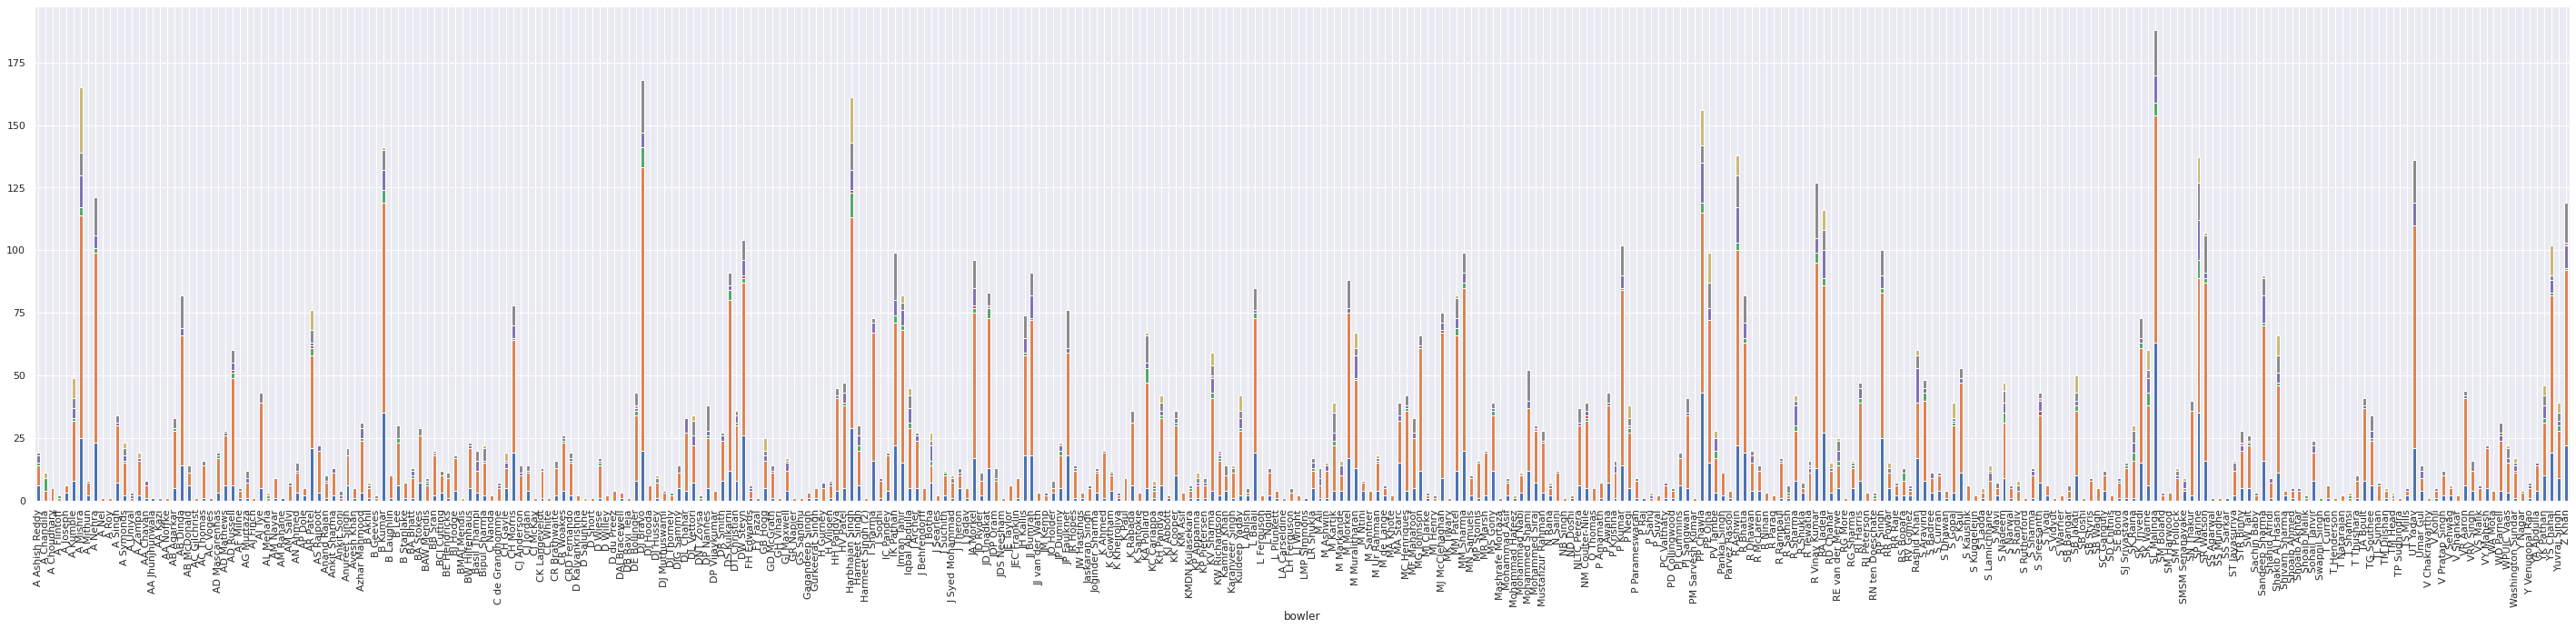

In [ ]:

top_10_wicket_takers_new = top__wicket_takers.pivot(columns='dismissal_kind',index='bowler').fillna(0)
#plot it
top_10_wicket_takers_new.plot(kind='bar',stacked=True,legend=False,figsize=(50,10))
# plt.figure(figsize=(30,10)) # setting size of plot
# plt.show()

## What is the most common way of dismissal??

In [ ]:
way_out_df = df2[['dismissal_kind']]
way_out_df.dropna()

,dismissal_kind
11,caught
64,caught
94,caught
116,bowled
160,bowled
...,...
179019,caught
179033,run out
179067,caught
179075,run out


In [ ]:
# creating a data frame that has counts of countries and players
most_way_out_df = pd.DataFrame(way_out_df.value_counts()) # taking values and converting to df
most_way_out_df = most_way_out_df.reset_index() # resetting the index
most_way_out_df.columns = ['type','no_of_times'] # renaming columns
most_way_out_df

,type,no_of_times
0,caught,5348
1,bowled,1581
2,run out,852
3,lbw,540
4,stumped,278
5,caught and bowled,211
6,retired hurt,12
7,hit wicket,10
8,obstructing the field,2


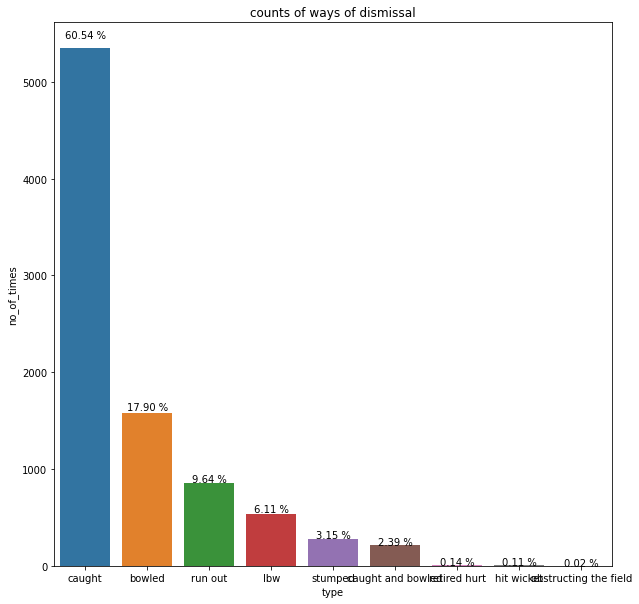

In [ ]:
# plot = most_way_out_df.plot.pie(y='no_of_times', figsize=(5, 5))
plt.figure(figsize=(10,10)) # setting size of plot
plt.title('counts of ways of dismissal')
ax = sns.barplot(x="type",y="no_of_times",data=most_way_out_df)
total = most_way_out_df['no_of_times'].sum()
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    per = height *100 / total
    x, y = p.get_xy() 
    ax.annotate(f'{per:.2f} %', (x + width/2, y + height*1.02), ha='center')

Whopping 60% people get out by being caught followed by getting bowled.

## Who became Man of The Match most number of times??

In [ ]:
matches_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [253]:
# creating a data frame that has counts of countries and players
player_of_match = pd.DataFrame(matches_df['player_of_match'].value_counts()) # taking values and converting to df
player_of_match = player_of_match.reset_index() # resetting the index
player_of_match.columns = ['Player','no_of_times'] # renaming columns
top_player_of_match = player_of_match.head(5)
top_player_of_match

,Player,no_of_times
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,DA Warner,17
4,RG Sharma,17


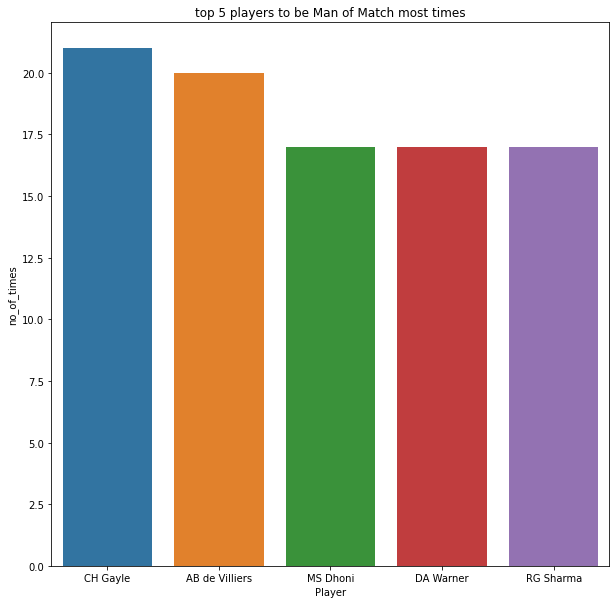

In [254]:
plt.figure(figsize=(10,10)) # setting size of plot
plt.title('top 5 players to be Man of Match most times')
ax = sns.barplot(x="Player", y='no_of_times', data = top_player_of_match)


Observation: Chris Gayle has become MoM most number of times